## Credit EDA Case Study

In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## 1. Import Libraries

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Loading The Data

In [4]:
#Reading the application_data csv file
appdata = pd.read_csv("application_data.csv")
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.1 Inspecting The Dataframe

In [5]:
# Checking the number of rows and columns in the dataframe
appdata.shape

(307511, 122)

In [6]:
appdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# Check the summary for the numeric columns
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Percentage of null values in each column
null_perc = appdata.isnull().sum()/len(appdata)*100

In [9]:
null_perc.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### 2.2 Data Cleaning

In [10]:

# Removing columns which having more than 45% missing values
appdata = appdata[ appdata.columns[appdata.isnull().sum() < (len(appdata)*0.45)] ]

In [11]:
# Checking the % of null values for each column in new dataset
null = appdata.isnull().sum()/len(appdata)*100
null.sort_values(ascending = False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

### 2.3 Best Metric To Impute Missing Values In Some Columns

#### 2.3.1  We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [12]:
appdata.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
appdata.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

#### 2.3.2 We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value '0'.

In [14]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [15]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

**2.3.3 Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns    'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense.**

In [16]:
appdata.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [17]:
appdata.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [18]:
appdata.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [19]:
appdata.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [20]:
appdata.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

#### 2.3.4 For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '450000'

In [21]:
appdata.AMT_GOODS_PRICE.value_counts() 

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [22]:
appdata.AMT_GOODS_PRICE.median()

450000.0

#### 2.3.5 For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903.0'

In [23]:
appdata.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [24]:
#Finding the median
appdata.AMT_ANNUITY.median()

24903.0

### 2.4 Errors in Data types and Data

#### 2.4.1 Imputing the absolute values in column ehich containing days in negative numbers

In [25]:
# The columns starting with 'DAYS'
filter_col = [col for col in appdata if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [26]:
# Checking the values present in columns starting with 'DAYS'
print(appdata['DAYS_BIRTH'].unique())
print(appdata['DAYS_EMPLOYED'].unique())
print(appdata['DAYS_REGISTRATION'].unique())
print(appdata['DAYS_ID_PUBLISH'].unique())
print(appdata['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [27]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
appdata[filter_col]= abs(appdata[filter_col])

In [28]:
print(appdata['DAYS_BIRTH'].unique())
print(appdata['DAYS_EMPLOYED'].unique())
print(appdata['DAYS_REGISTRATION'].unique())
print(appdata['DAYS_ID_PUBLISH'].unique())
print(appdata['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [29]:
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [30]:
appdata.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### 2.4.2 Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [31]:
# Replacing XNA value with F
appdata.loc[appdata.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
appdata.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [32]:
appdata.ORGANIZATION_TYPE.value_counts().head(10)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: ORGANIZATION_TYPE, dtype: int64

#### 2.4.3 Imputing the value'XNA' which means not available for the column 'ORGANIZATION_TYPE'

In [33]:

# Replacing XNA with NaN
appdata = appdata.replace('XNA',np.NaN)

In [34]:
appdata.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### 2.5 Binning of continuous variables

In [35]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
appdata['AMT_INCOME_RANGE'] = pd.qcut(appdata.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appdata['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [36]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
appdata['AMT_CREDIT_RANGE'] = pd.qcut(appdata.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appdata['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [37]:
appdata['AMT_CREDIT_RANGE'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [38]:
# Converting 'DAYS_BIRTH' to years
appdata['DAYS_BIRTH']= (appdata['DAYS_BIRTH']/365).astype(int)

In [39]:
appdata['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [40]:
# Biining 'DAYS_BIRTH'
appdata['DAYS_BIRTH_BINS']=pd.cut(appdata['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [41]:
appdata['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

## 3. Analysis

### 3.1 Finding Outliers

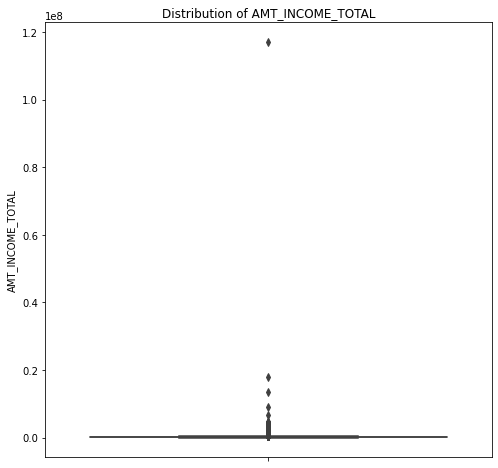

In [42]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
plt.figure(figsize=[8,8])
sns.boxplot(y=appdata["AMT_INCOME_TOTAL"])
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.show()

Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client. We observe a value of 100M which is surely an outlier.

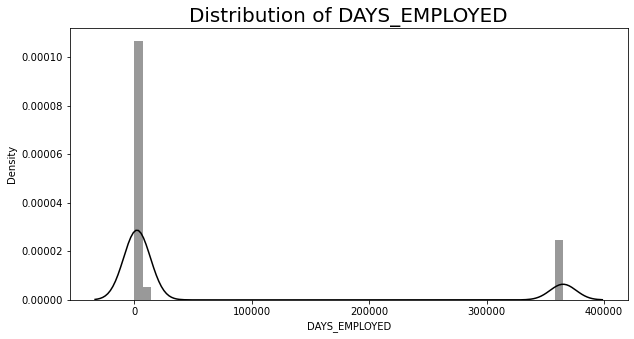

In [43]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize=[10,5])
sns.distplot(appdata['DAYS_EMPLOYED'], color="black" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

Here, in the coloumn 'DAYS_EMPLOYED' which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.

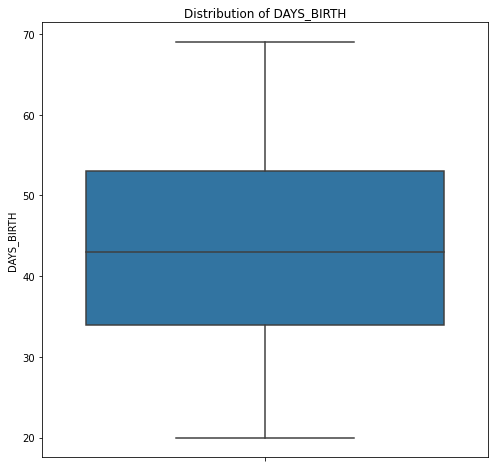

In [44]:
plt.figure(figsize=[8,8])
sns.boxplot(y=appdata["DAYS_BIRTH"])
plt.title("Distribution of DAYS_BIRTH")
plt.show()



We do not find any outliers in the coloumn 'DAYS_BIRTH'.

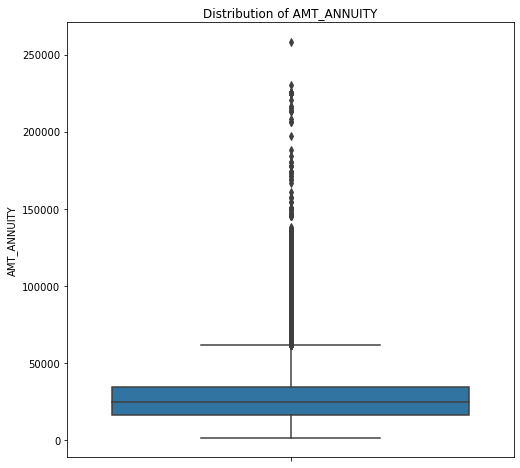

In [45]:
plt.figure(figsize=[8,8])
sns.boxplot(y=appdata["AMT_ANNUITY"])
plt.title("Distribution of AMT_ANNUITY")
plt.show()


Here, in the coloumn 'AMT_AANNUITY' which tells the loan annuity. We observe a value which is greater that 258000 which is surely an outlier.

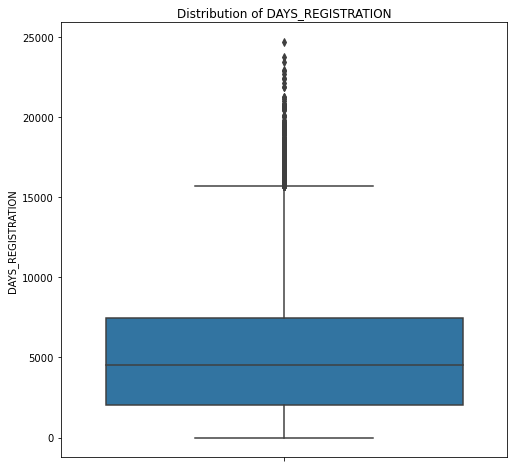

In [46]:
plt.figure(figsize=[8,8])
sns.boxplot(y=appdata["DAYS_REGISTRATION"])
plt.title("Distribution of DAYS_REGISTRATION")
plt.show()



Here, in the coloumn 'DAYS_REGISTRATION' which how many days before the application did client change his registration. We observe a value which is greater that 24000 which is surely an outlier.

### 3.2 Checking the distribution

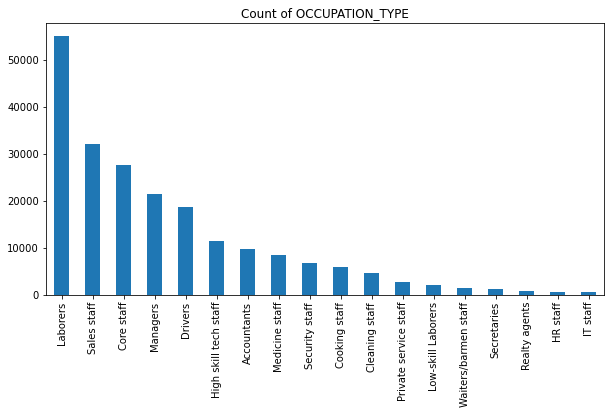

In [47]:
# Distribution of 'OCCUPATION_TYPE'
plt.figure(figsize=[10,5])
appdata["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.title("Count of OCCUPATION_TYPE")
plt.show()


We can observer that Labourers, Sales Staff and Core Staff constitute the majority whereas IT Staff is on the lower side.

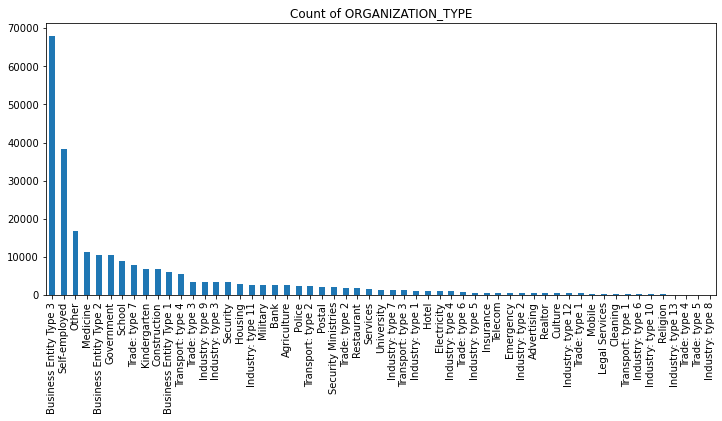

In [48]:
# Distribution of 'ORGANIZATION_TYPE'

plt.figure(figsize=[12,5])
appdata["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Count of ORGANIZATION_TYPE")
plt.show()



We can observe that Business Entity Type 3 organizations have majority of the loan applications.

### 3.3 Checking Imbalance

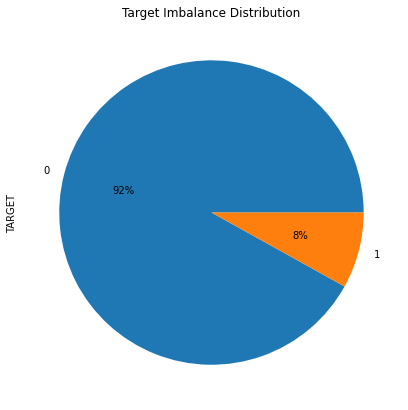

In [49]:
plt.figure(figsize=[7,7])
appdata["TARGET"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Target Imbalance Distribution")
plt.show()



The imbalance is high between target variables.

### 3.4 Dividing the dataset into two different datasets based upon 'Target' value.

In [50]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = appdata.loc[appdata.TARGET == 0]
target1 = appdata.loc[appdata.TARGET == 1]

### 3.5 Univariate Analysis of Categorical Variables

#### Gender Distribution

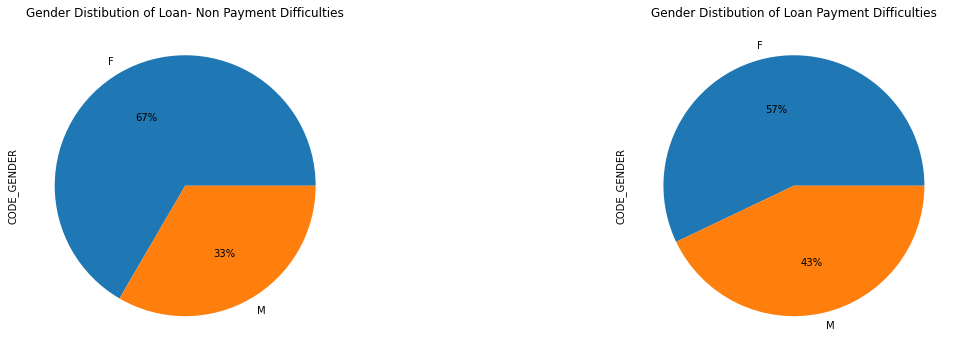

In [51]:
# Gender Distibution of Loan Non-Payment & Payment Difficulties

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["CODE_GENDER"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Gender Distibution of Loan- Non Payment Difficulties")

plt.subplot(1,2,2)
target1["CODE_GENDER"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Gender Distibution of Loan Payment Difficulties")
plt.show()



Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties

#### Income Source

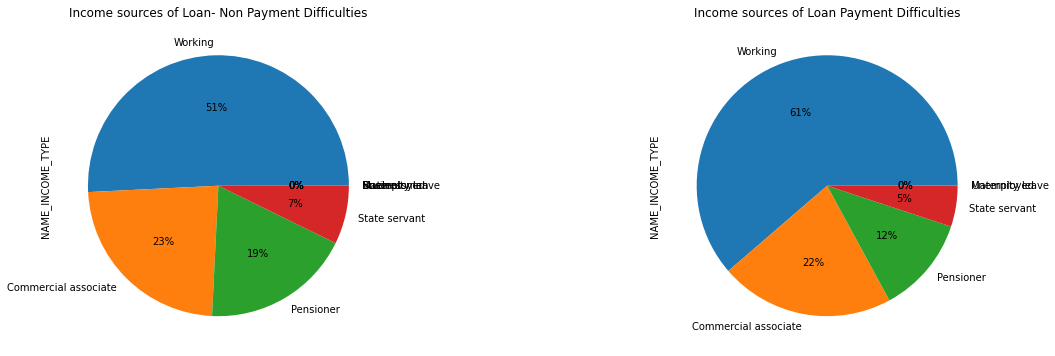

In [52]:
# Income sources of Loan- Non Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Income sources of Loan- Non Payment Difficulties")

plt.subplot(1,2,2)
target1["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Income sources of Loan Payment Difficulties")

plt.show()






We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared the percentages of both Payment Difficulties and non-Payment Difficulties.

#### Family Status

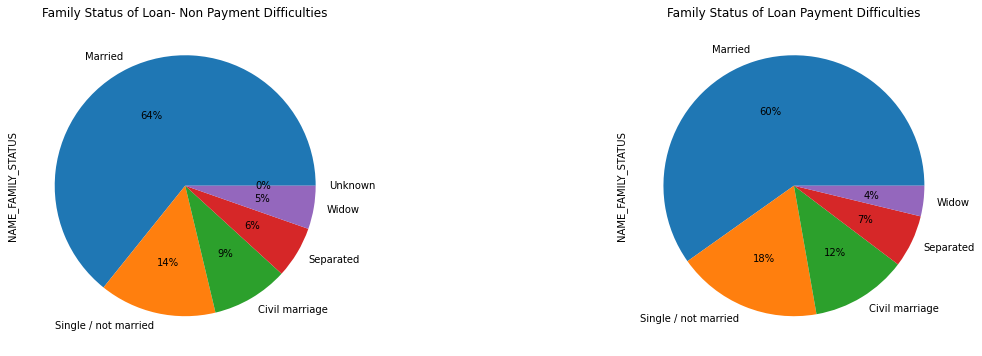

In [53]:
# Family Status of Loan- Non Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Family Status of Loan- Non Payment Difficulties")

plt.subplot(1,2,2)
target1["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Family Status of Loan Payment Difficulties")

plt.show()


We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties

#### Education

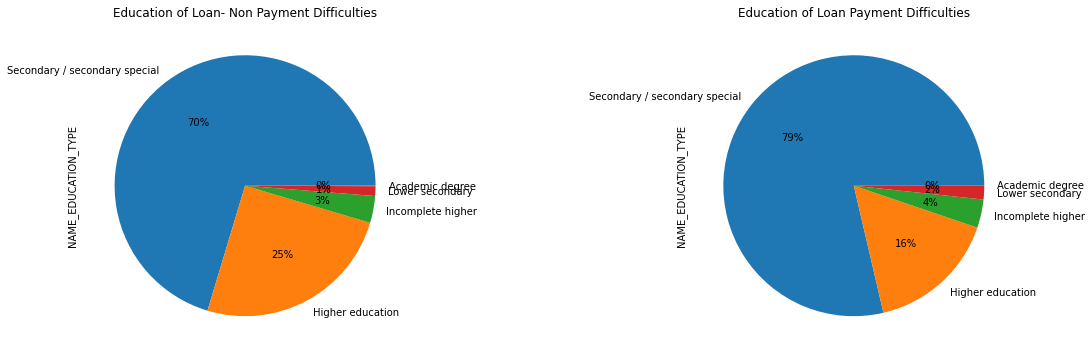

In [54]:
# Education of Loan- Non Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Education of Loan- Non Payment Difficulties")

plt.subplot(1,2,2)
target1["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Education of Loan Payment Difficulties")

plt.show()

We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties

#### Housing

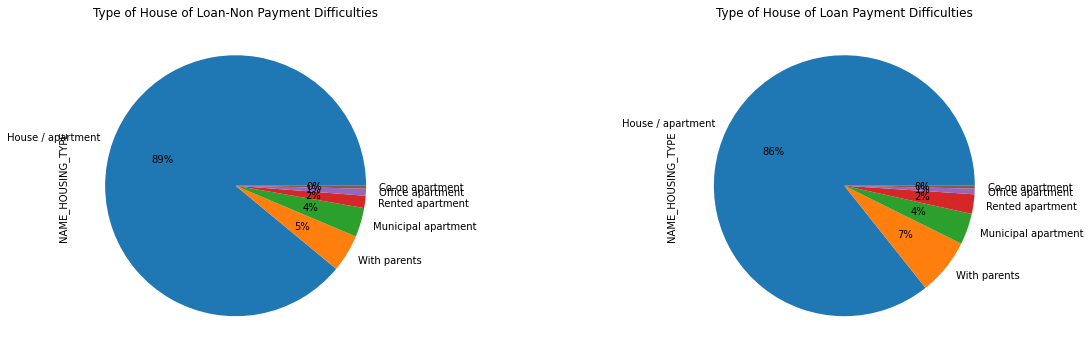

In [55]:
# Type of House of Loan- Non Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Type of House of Loan-Non Payment Difficulties")

plt.subplot(1,2,2)
target1["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Type of House of Loan Payment Difficulties")

plt.show()

We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

#### Income Range

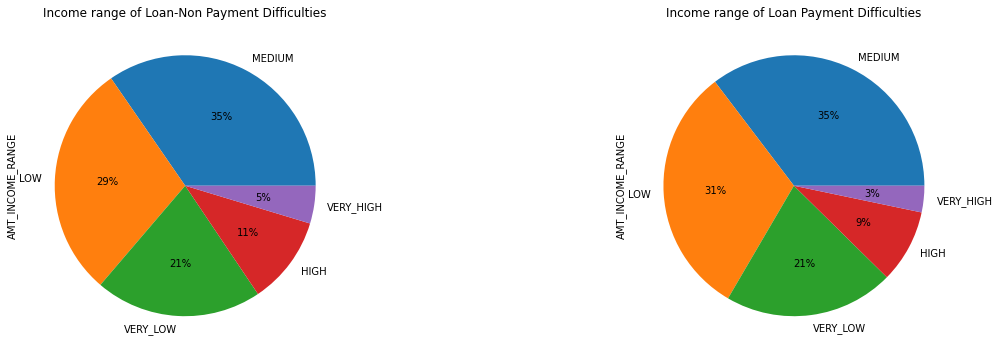

In [56]:
# Income range of Loan-Non Payment  & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Income range of Loan-Non Payment Difficulties")

plt.subplot(1,2,2)
target1["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Income range of Loan Payment Difficulties")

plt.show()



We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties

#### Age

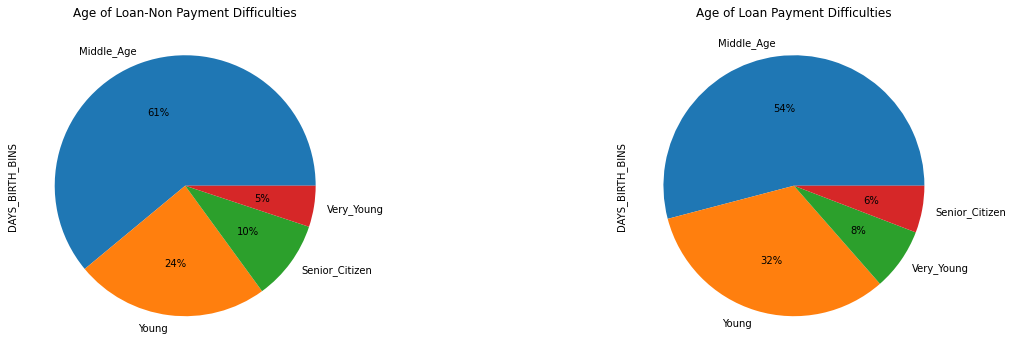

In [57]:
# Age of Loan-Non Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["DAYS_BIRTH_BINS"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Age of Loan-Non Payment Difficulties")

plt.subplot(1,2,2)
target1["DAYS_BIRTH_BINS"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Age of Loan Payment Difficulties")

plt.show()



We observe that there is an increase in the percentage of Loan Payment Difficulties who are young in age when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

#### Type of Loan

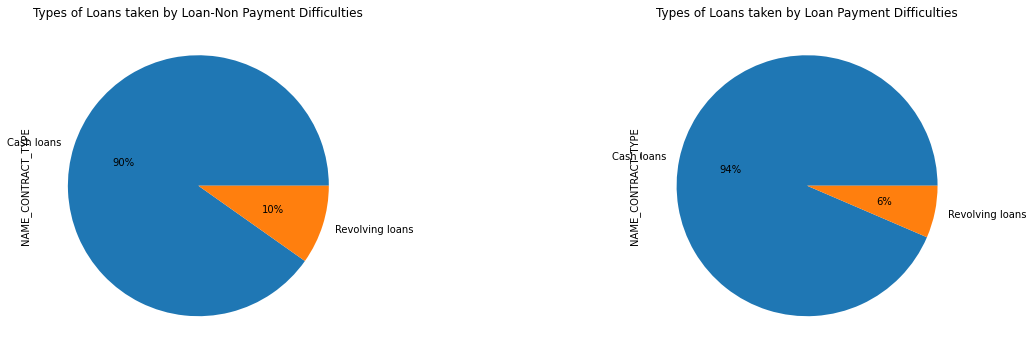

In [58]:
# Types of Loans taken by Loan-Non Payment & Payment Difficulties 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Types of Loans taken by Loan-Non Payment Difficulties")

plt.subplot(1,2,2)
target1["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Types of Loans taken by Loan Payment Difficulties")

plt.show()



We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans. 

#### Accompanyed By

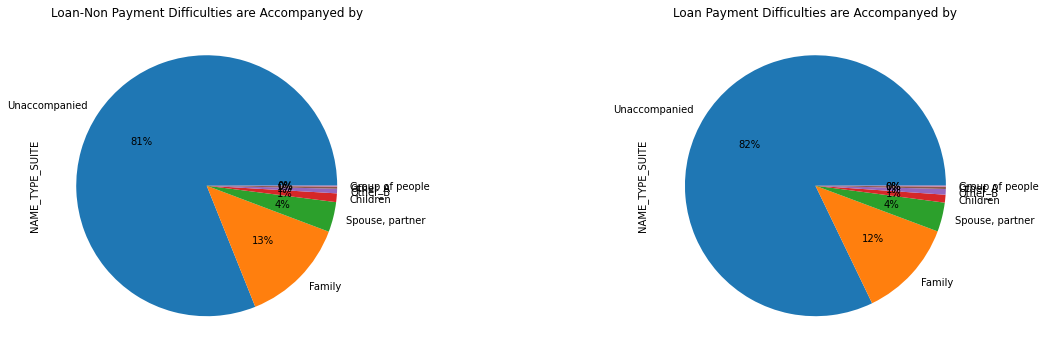

In [59]:
# Loan-Non Payment & Payment Difficulties are Accompanied by
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Loan-Non Payment Difficulties are Accompanyed by")

plt.subplot(1,2,2)
target1["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Loan Payment Difficulties are Accompanyed by")

plt.show()



We do not observe any major changes here.

#### Organization Type

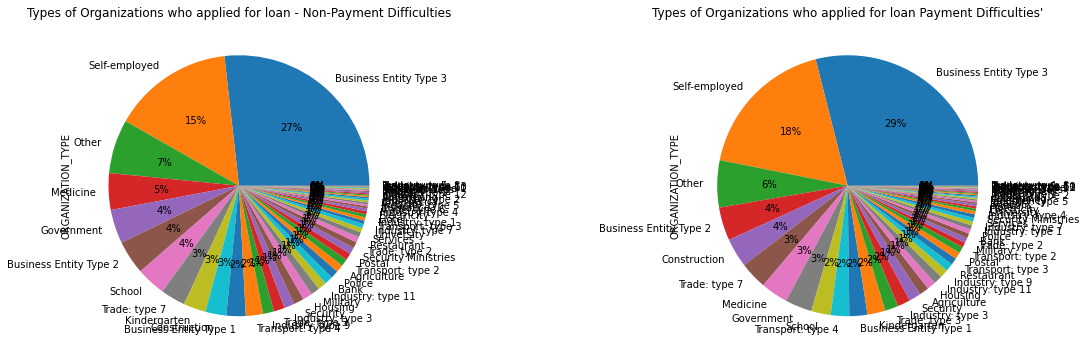

In [60]:
# Types of Organizations who applied for loan - Non-Payment & Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["ORGANIZATION_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Types of Organizations who applied for loan - Non-Payment Difficulties")

plt.subplot(1,2,2)
target1["ORGANIZATION_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Types of Organizations who applied for loan Payment Difficulties'")

plt.show()




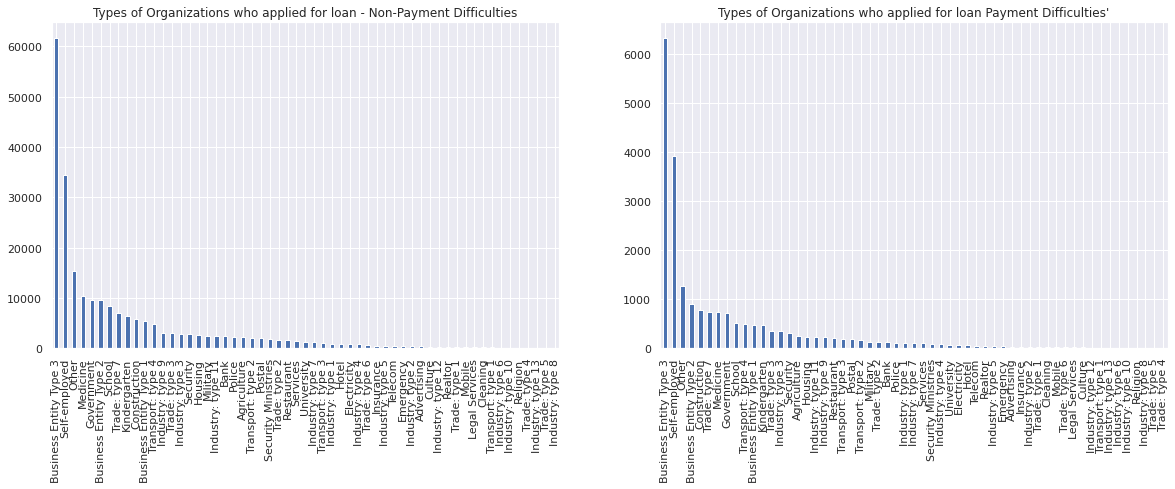

In [270]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
target0["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan - Non-Payment Difficulties")

plt.subplot(1,2,2)
target1["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan Payment Difficulties'")

plt.show()

We can observe no major changes here.

### 3.6 Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

#### Loan Annuity

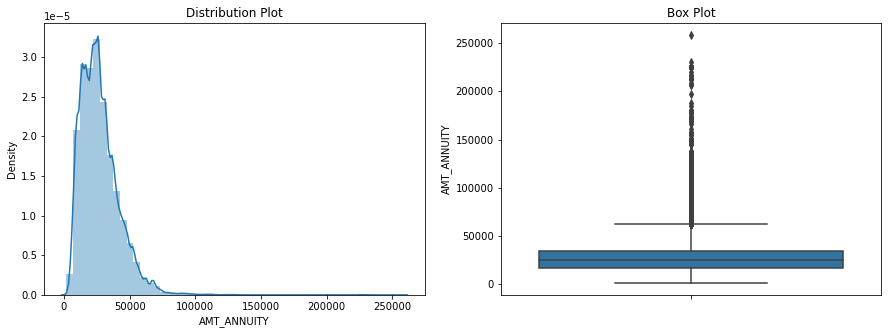

In [61]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target0["AMT_ANNUITY"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target0["AMT_ANNUITY"])
plt.title("Box Plot")

plt.show()

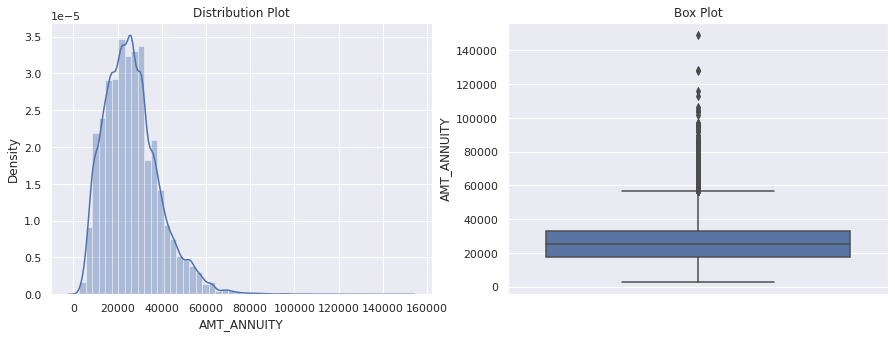

In [272]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Payment Difficulties
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target1["AMT_ANNUITY"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target1["AMT_ANNUITY"])
plt.title("Box Plot")

plt.show()

We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

#### Credit Amount

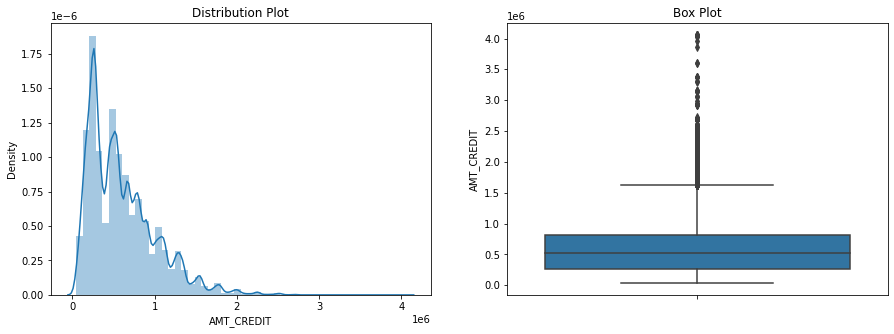

In [62]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Non-Payment Difficulties
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target0["AMT_CREDIT"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target0["AMT_CREDIT"])
plt.title("Box Plot")

plt.show()


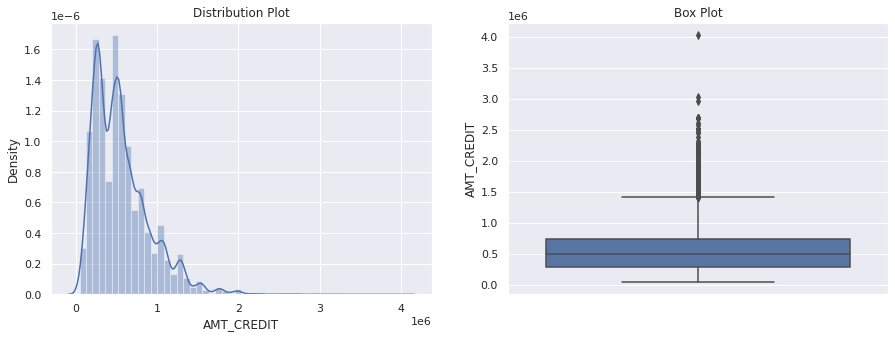

In [274]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Payment Difficulties
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target1["AMT_CREDIT"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target1["AMT_CREDIT"])
plt.title("Box Plot")

plt.show()

We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile. The distribution curve does not appear to be normal or bell curve.

#### Goods Price

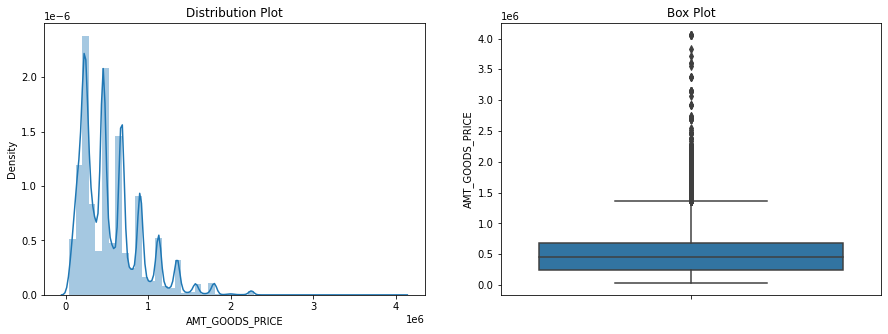

In [63]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan- Non-Payment Difficulties
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target0["AMT_GOODS_PRICE"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target0["AMT_GOODS_PRICE"])
plt.title("Box Plot")

plt.show()



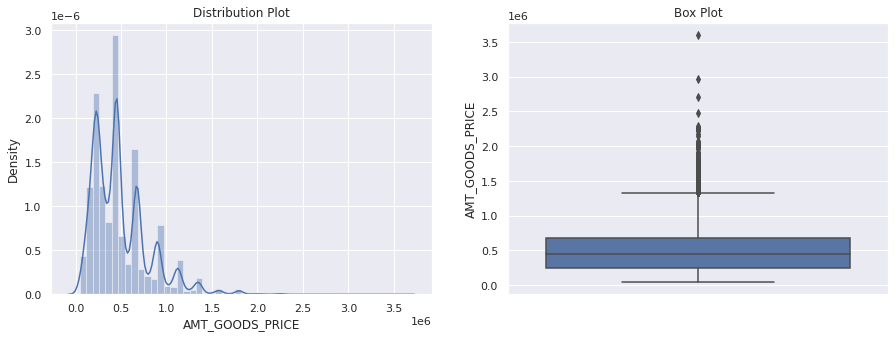

In [276]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan-Payment Difficulties

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(target1["AMT_GOODS_PRICE"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=target1["AMT_GOODS_PRICE"])
plt.title("Box Plot")

plt.show()


We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

### 3.7 Bivariate Analysis


#### 3.7.1 Bivariate Analysis of Categorical vs Numerical Variables

#### Analysis - 1

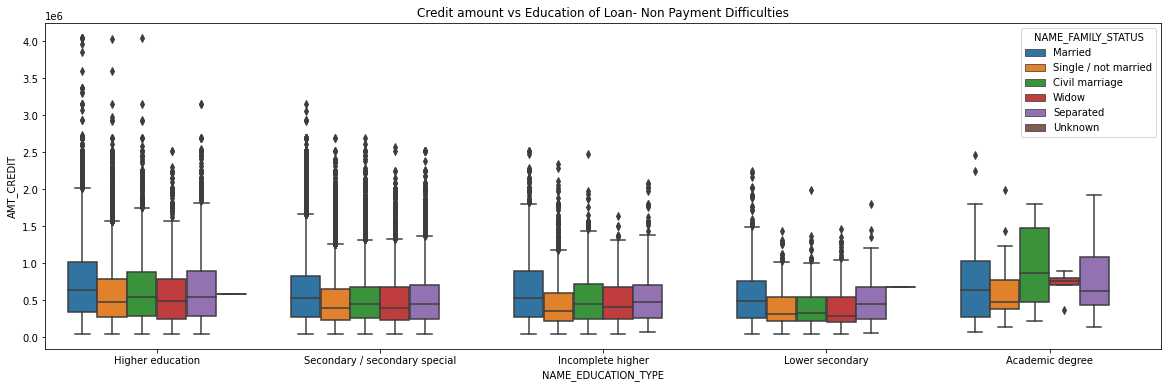

In [64]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize=(20,6))
sns.boxplot(data=target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT",hue= 'NAME_FAMILY_STATUS')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties")
plt.show()

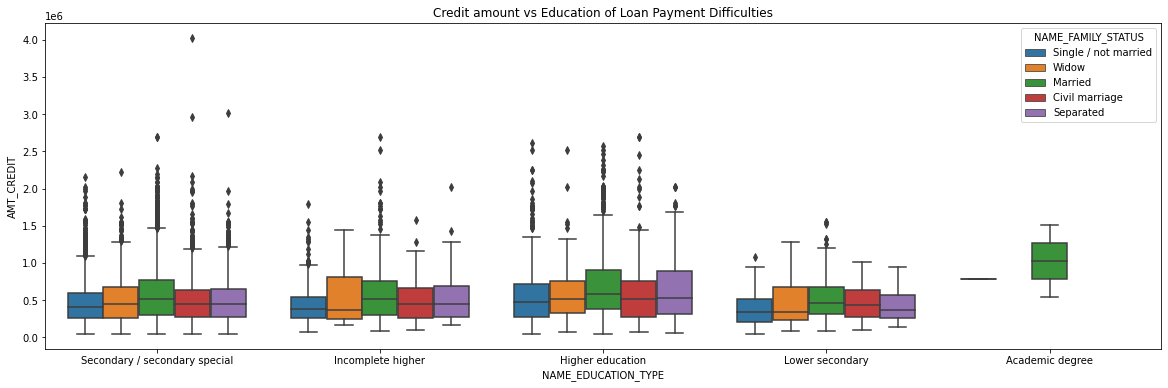

In [65]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan Payment Difficulties
plt.figure(figsize=(20,6))
sns.boxplot(data=target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT",hue= 'NAME_FAMILY_STATUS' )
plt.title("Credit amount vs Education of Loan Payment Difficulties")
plt.show()

The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties apperas to be similar. We observe that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

#### Analysis - 2

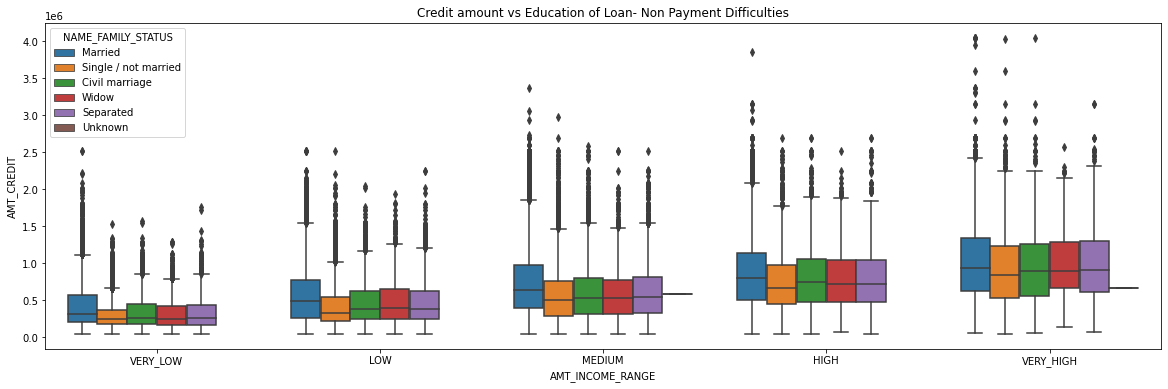

In [66]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties

plt.figure(figsize=(20,6))
sns.boxplot(data=target0, x="AMT_INCOME_RANGE", y="AMT_CREDIT",hue= 'NAME_FAMILY_STATUS')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties")
plt.show()



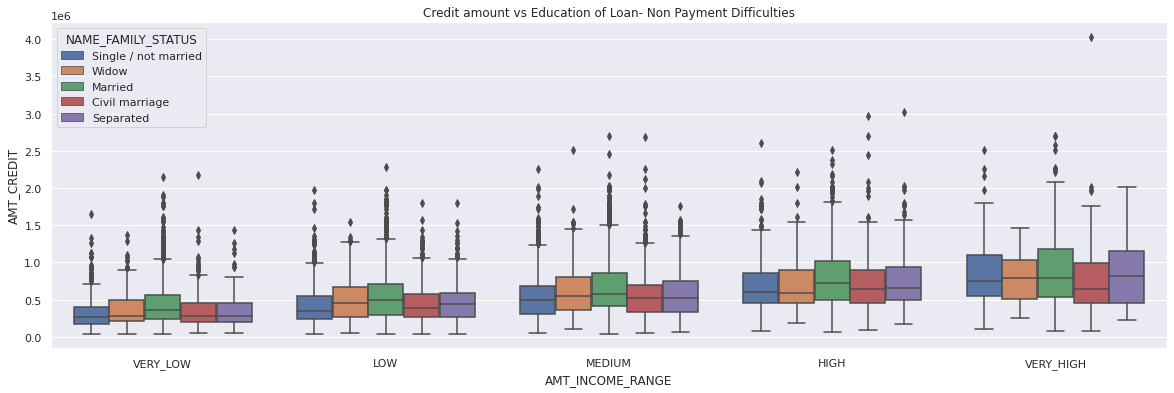

In [280]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan Payment Difficulties

plt.figure(figsize=(20,6))
sns.boxplot(data=target1, x="AMT_INCOME_RANGE", y="AMT_CREDIT",hue= 'NAME_FAMILY_STATUS')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties")
plt.show()

The graphs for Loan Payment Difficulties and Loan- Non Payment Difficulties apperas to be similar. We observe that Family status of 'single', 'seperated' and 'married' of income range veryhigh are having higher number of credits than others.

#### 3.7.2 Bivariate Analysis of Categorical-Categorical

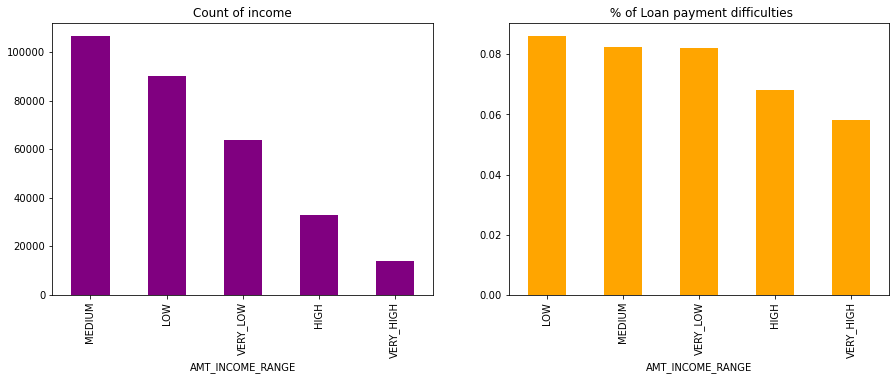

In [67]:
#Distribution of income range and the category with maximum Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata.groupby('AMT_INCOME_RANGE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.title("Count of income")

plt.subplot(1,2,2)
(target1.groupby('AMT_INCOME_RANGE')['TARGET'].count()/appdata.groupby('AMT_INCOME_RANGE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="orange")
plt.title(" % of Loan payment difficulties")
plt.show()

From the plot above we can say that clients with 'LOW' Income range have maximum % of Loan-Payment Difficulties.

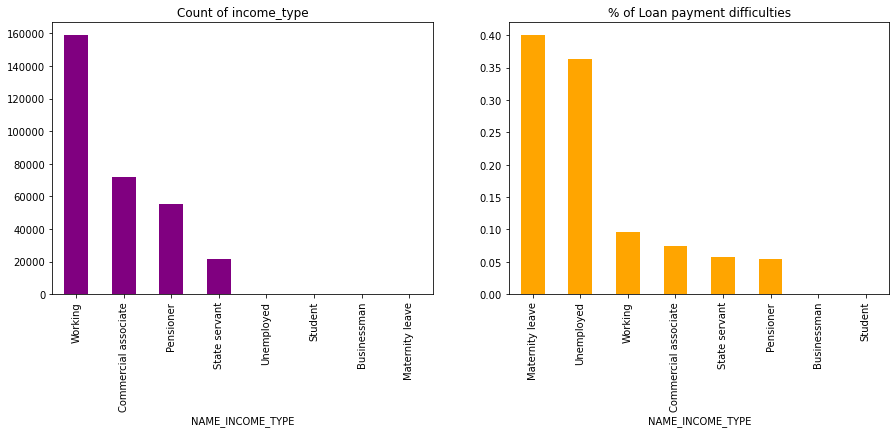

In [68]:
# Distribution of income range and the category with maximum Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata.groupby('NAME_INCOME_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.title("Count of income_type")

plt.subplot(1,2,2)
(target1.groupby('NAME_INCOME_TYPE')['TARGET'].count()/appdata.groupby('NAME_INCOME_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="orange")
plt.title("% of Loan payment difficulties")
plt.show()

From the plot above we can say that clients with 'Maternity leave' Income type have maximum % of Loan-Payment Difficulties.

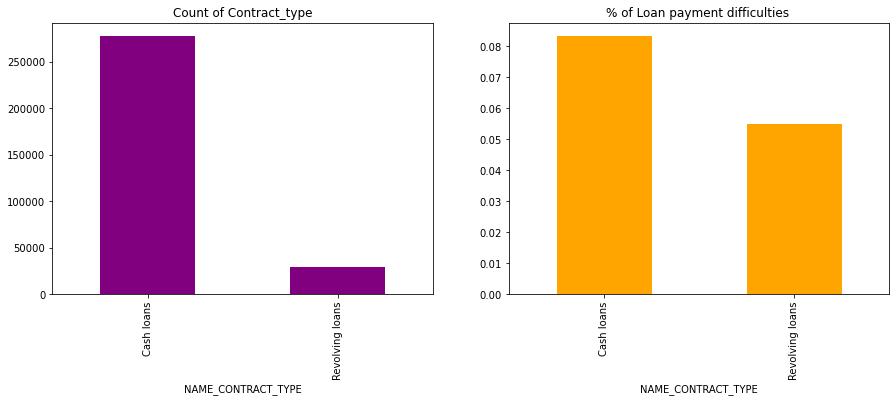

In [69]:
# Distribution of Contract Type and the category with maximum Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata.groupby('NAME_CONTRACT_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.title("Count of Contract_type")

plt.subplot(1,2,2)
(target1.groupby('NAME_CONTRACT_TYPE')['TARGET'].count()/appdata.groupby('NAME_CONTRACT_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="orange")
plt.title("% of Loan payment difficulties ")
plt.show()

From the plot above we can say that clients with 'Cash loans' contract type have maximum % of Loan-Payemnt Difficulties.

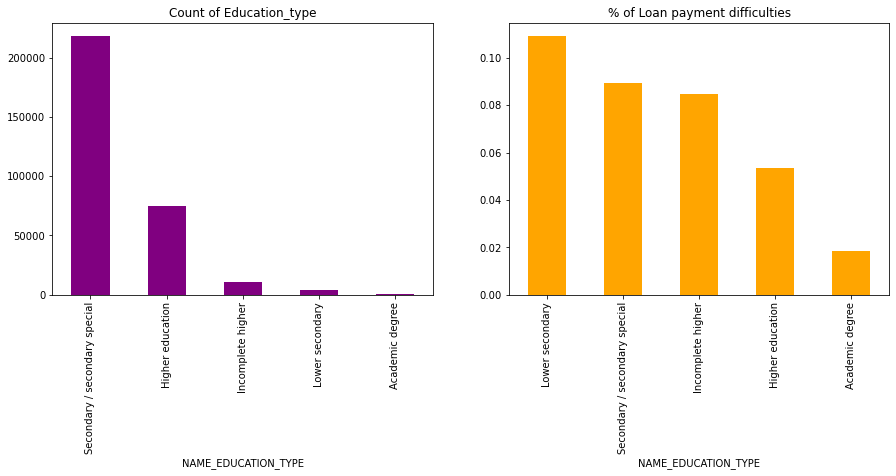

In [70]:
# Distribution of Education Type and the category with maximum Loan-Payment Difficulties

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata.groupby('NAME_EDUCATION_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.title("Count of Education_type")

plt.subplot(1,2,2)
(target1.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()/appdata.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="orange")
plt.title("% of Loan payment difficulties")
plt.show()

From the plot above we can say that clients with 'Lower secondary' education type have maximum % of Loan-Payment Difficulties.

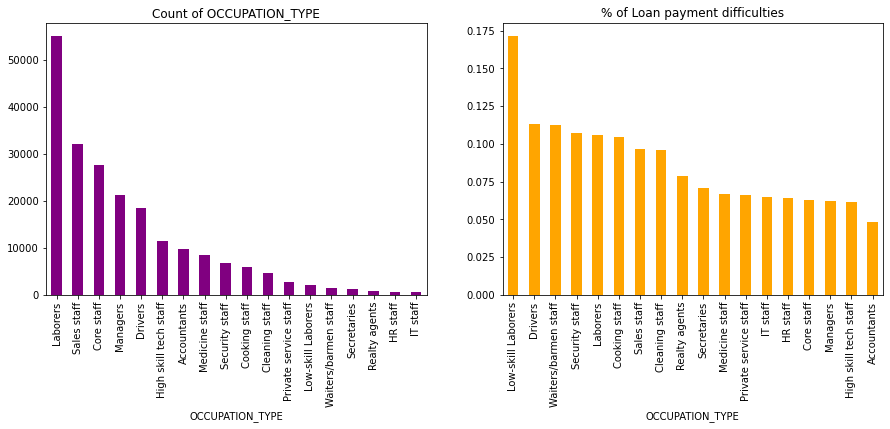

In [71]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata.groupby('OCCUPATION_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.title("Count of OCCUPATION_TYPE")

plt.subplot(1,2,2)
(target1.groupby('OCCUPATION_TYPE')['TARGET'].count()/appdata.groupby('OCCUPATION_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="orange")
plt.title("% of Loan payment difficulties")
plt.show()

From the plot above we can say that clients with 'Lower skill Laborers' occupation type have maximum % of Loan-Payment Difficulties.

In [72]:
table= pd.pivot_table(appdata, values='TARGET', index=['CODE_GENDER','AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

In [73]:
table

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          0.056068   
            LOW                      0.000000          0.049022   
            MEDIUM                   0.000000          0.050254   
            HIGH                     0.105263          0.041516   
            VERY_HIGH                0.076923          0.037289   
M           VERY_LOW                 0.000000          0.080411   
            LOW                      0.000000          0.073305   
            MEDIUM                   0.000000          0.070086   
            HIGH                     0.000000          0.055911   
            VERY_HIGH                0.000000          0.044080   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   0.086399         0.080193   
            LOW                        0.080075         0.113889   
            MEDIUM                     0.078431         0.096983   
            HIGH                       0.074313         0.038961   
            VERY_HIGH                  0.082251         0.066667   
M           VERY_LOW                   0.123967         0.125000   
            LOW                        0.097778         0.142857   
            MEDIUM                     0.095130         0.150515   
            HIGH                       0.074627         0.081633   
            VERY_HIGH                  0.077586         0.064516   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               0.076778  
            LOW                                    0.079523  
            MEDIUM                                 0.075692  
            HIGH                                   0.070736  
            VERY_HIGH                              0.065930  
M           VERY_LOW                               0.118066  
            LOW                                    0.123693  
            MEDIUM                                 0.113466  
            HIGH                                   0.093484  
            VERY_HIGH                              0.089939

- From Female category Clients who have LOW income and ACADEMIC DEGREE education have maximum % of Loan-Payment Difficulties
- From Male category Clients wo have MEDIUM income and LOWER SECONDARY education have maximum % of Loan-Payment Difficulties

#### 3.7.3 Bivariate Analysis of Numerical vs Numerical Variables

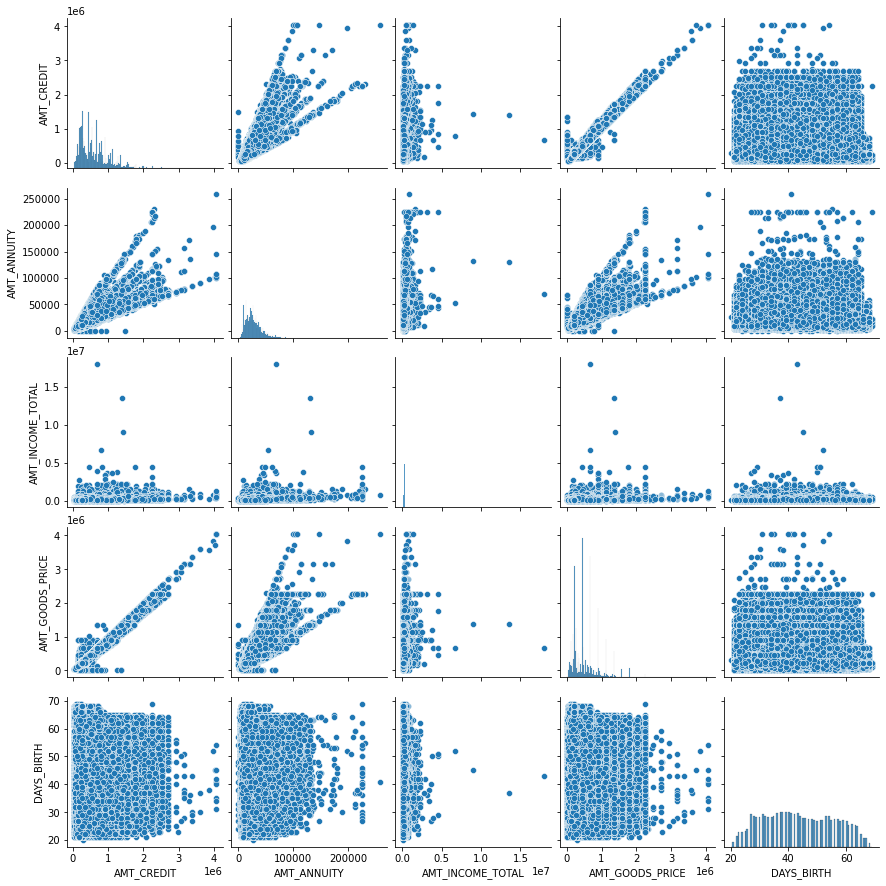

In [74]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

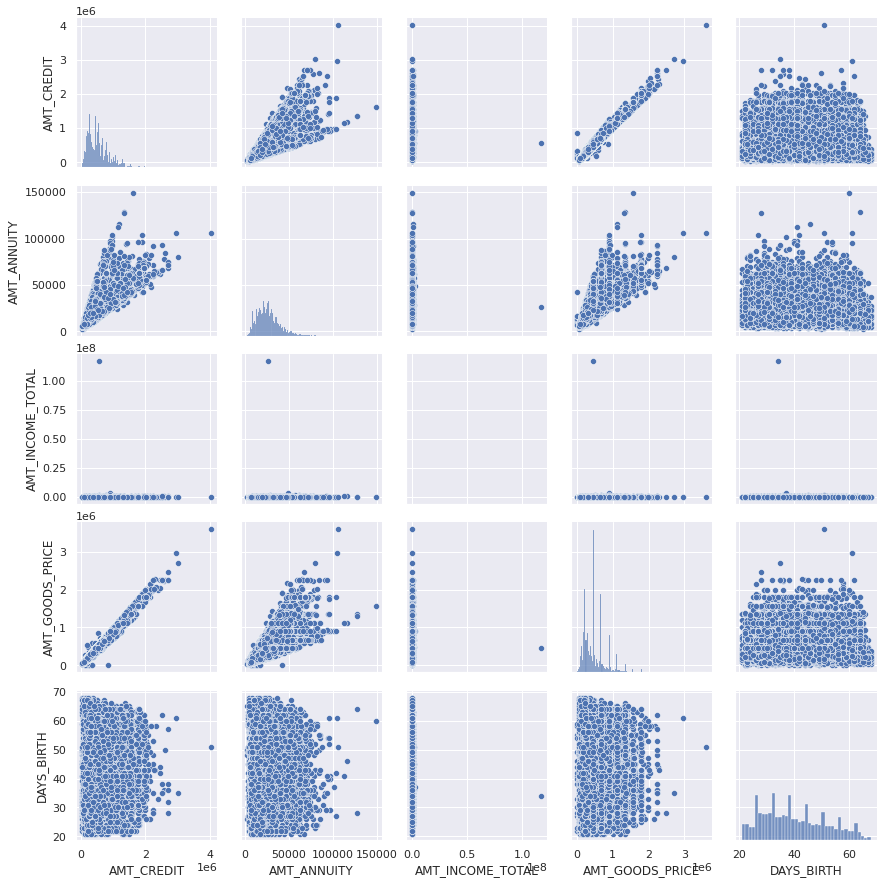

In [289]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

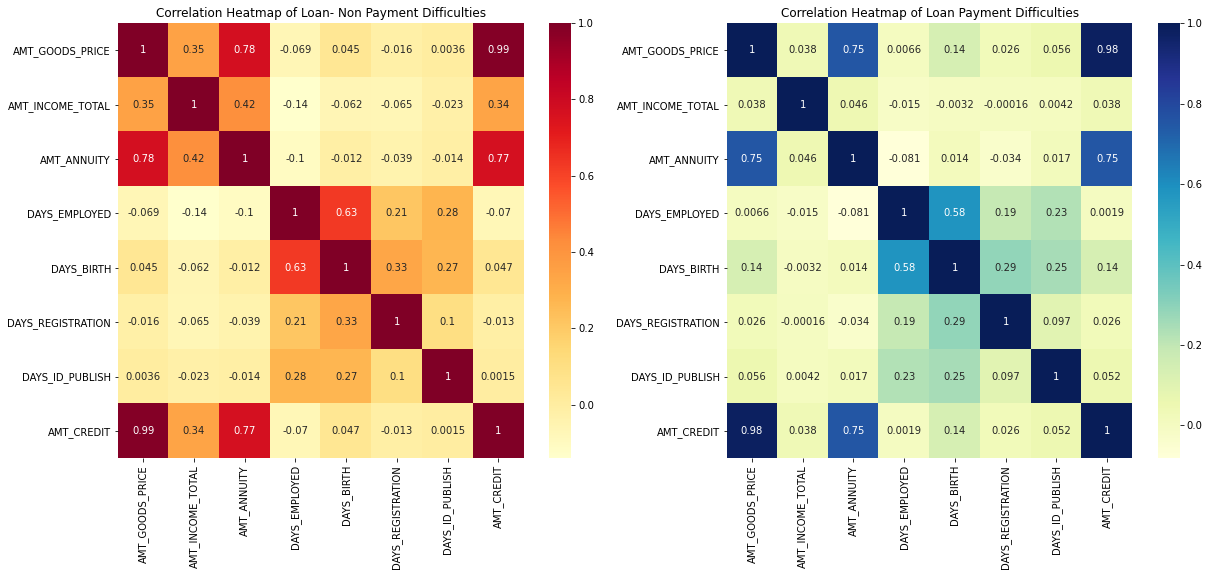

In [77]:
# Heatmap for Loan- Non Payment Difficulties
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.title("Correlation Heatmap of Loan- Non Payment Difficulties")
heat_0=target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr()

sns.heatmap(heat_0,annot=True,cmap="YlOrRd")

plt.subplot(1,2,2)
plt.title("Correlation Heatmap of Loan Payment Difficulties")

heat_1=target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr()

sns.heatmap(heat_1,annot=True,cmap="YlGnBu")

plt.show()

We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

**Top 10 Correlation for client with payment difficulties**

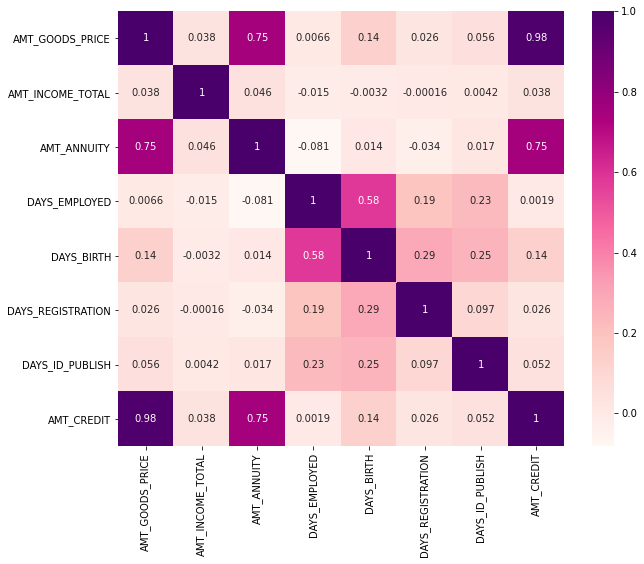

In [80]:
data=target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
plt.figure(figsize=[10,8])
sns.heatmap(data,annot=True,cmap="RdPu")
plt.show()

In [78]:
corr=target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [79]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [81]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135603,0.135603
60,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070


The above dataframe shows top 10 correlation for clients with payment difficulties

## 4. Data Analysis on Previous Application data

#### 4.1 Data loading and cleaning

In [82]:
# loading the previous_application.csv
appdata_prev= pd.read_csv('previous_application.csv')

In [83]:
# chnaging the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in appdata_prev if col.startswith('DAYS')]
appdata_prev[filter_col]= abs(appdata_prev[filter_col])

In [84]:
appdata_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# XNA and XAP are replaced by NaN
appdata_prev=appdata_prev.replace('XNA', np.NaN)
appdata_prev=appdata_prev.replace('XAP', np.NaN)

In [86]:
# Value counts of Contract Status in previous application
appdata_prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### 4.2 Some Univariate Analysis on previous application data

#### Contract Status

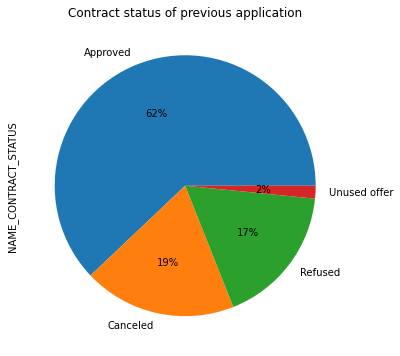

In [87]:
# Contract status of previous application
plt.figure(figsize=(10,6))
appdata_prev["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Contract status of previous application")
plt.show()

We can observe that majority of loans are approved and very less percentage of loans are unused offer

#### Day of the week

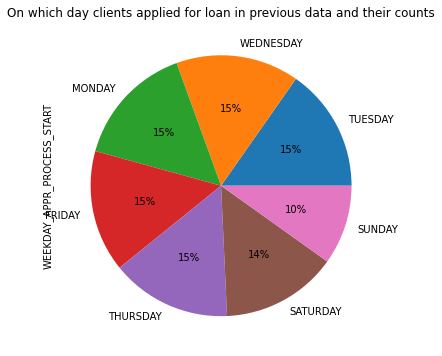

In [88]:
# On which day clients applied for loan in previous data and their counts
plt.figure(figsize=(10,6))
appdata_prev["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("On which day clients applied for loan in previous data and their counts")
plt.show()


We observe that there are less number of applicants that come in the weekends.

#### Payment Method

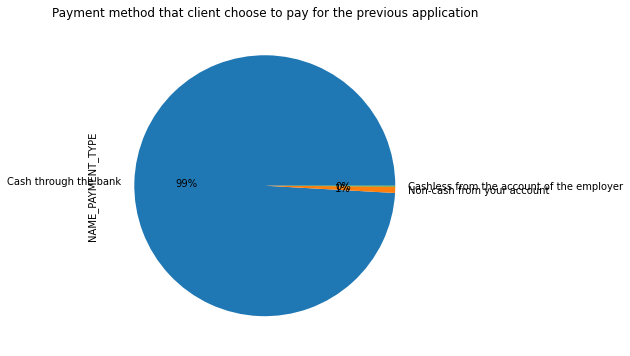

In [89]:
# Payment method that client choose to pay for the previous application

plt.figure(figsize=(10,6))
appdata_prev["NAME_PAYMENT_TYPE"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Payment method that client choose to pay for the previous application")
plt.show()



99% of the clients chose to pay cash through bank.

#### Reasons of previous application rejection

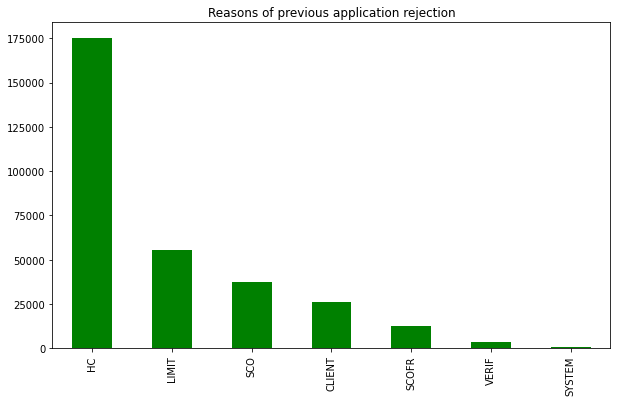

In [90]:
# Reasons of previous application rejection
plt.figure(figsize=(10,6))
appdata_prev["CODE_REJECT_REASON"].value_counts().plot.bar(color='green')
plt.title("Reasons of previous application rejection")
plt.show()


We observe that HC is the reason majority of applications got rejetced.

#### Client Type

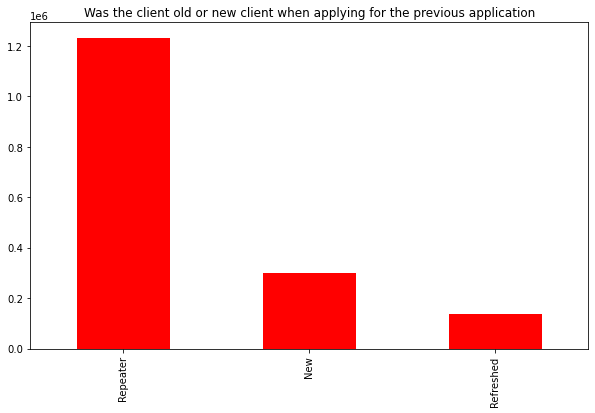

In [91]:
# Was the client old or new client when applying for the previous application
plt.figure(figsize=(10,6))
appdata_prev["NAME_CLIENT_TYPE"].value_counts().plot.bar(color='red')
plt.title("Was the client old or new client when applying for the previous application")
plt.show()



We obeserve that majority of the clients are repeters.

#### Was the previous application for CASH, POS, CAR, CARDS

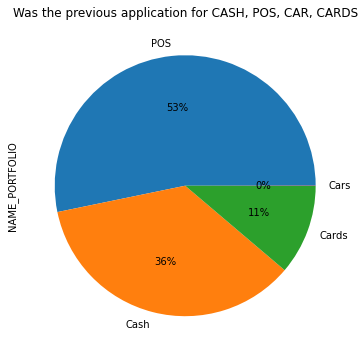

In [92]:
# Was the previous application for CASH, POS, CAR, CARDS
plt.figure(figsize=(10,6))
appdata_prev["NAME_PORTFOLIO"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Was the previous application for CASH, POS, CAR, CARDS")
plt.show()



We observe that majority of previous application is for POS and a good amount of it is for cash.

#### Type of goods

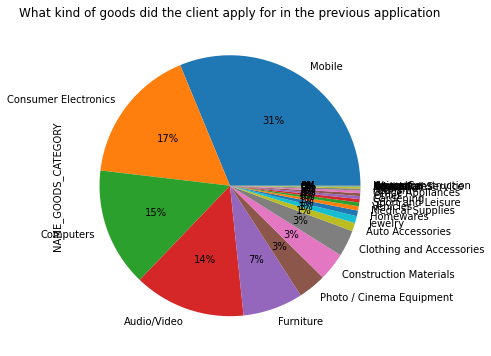

In [93]:
# What kind of goods did the client apply for in the previous application
plt.figure(figsize=(10,6))
appdata_prev["NAME_GOODS_CATEGORY"].value_counts().plot.pie(autopct='%.0f%%')
plt.title("What kind of goods did the client apply for in the previous application")
plt.show()



We observe that the majority of loans are for mobiles, consumer electronics, computers and Audio/Video.

#### Univariate analysis of numerical columns

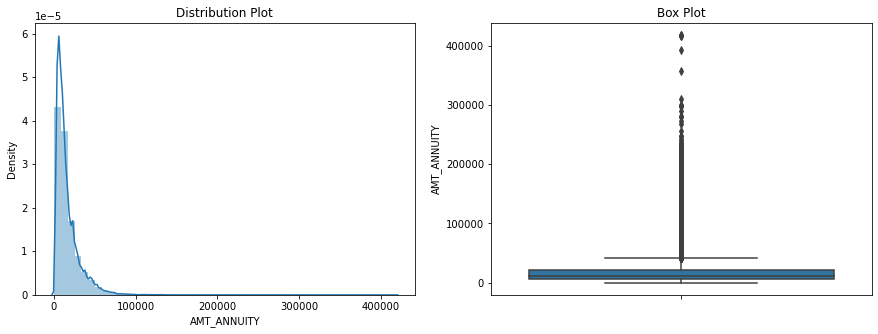

In [94]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(appdata_prev["AMT_ANNUITY"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=appdata_prev["AMT_ANNUITY"])
plt.title("Box Plot")

plt.show()

We observe that there are some outliers and the curve is not normal or a bell curve

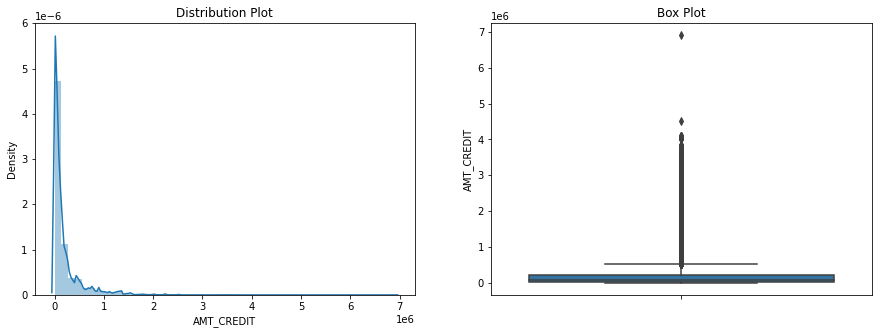

In [95]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(appdata_prev["AMT_CREDIT"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=appdata_prev["AMT_CREDIT"])
plt.title("Box Plot")

plt.show()

We observe that there are some outliers and the curve is not normal or a bell curve

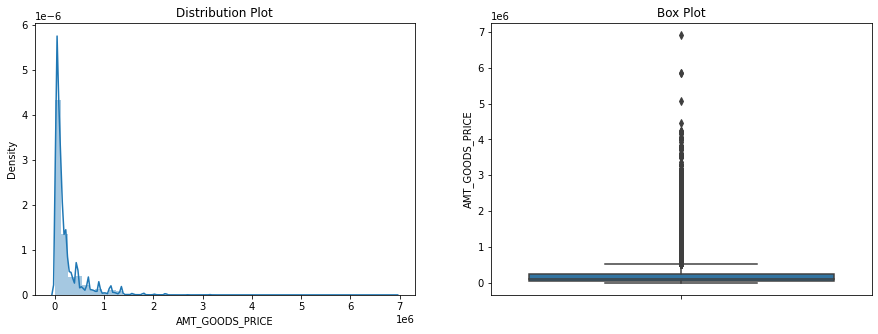

In [96]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(appdata_prev["AMT_GOODS_PRICE"])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(y=appdata_prev["AMT_GOODS_PRICE"])
plt.title("Box Plot")

plt.show()

We observe that there are some outliers and the curve is not normal or a bell curve

#### 4.3 Bivariate analysis after combining previous and current data

In [97]:
# Taking SK_ID_CURR and TARGET column from application data for further analysis
appdata_new=appdata[['SK_ID_CURR','TARGET']]

In [98]:
appdata_new

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307506,456251,0
307507,456252,0
307508,456253,0
307509,456254,1


In [99]:
# merging application and previous application data on 'SK_ID_CURR'
appdata_merge = appdata_new.merge(appdata_prev,on='SK_ID_CURR', how='inner')
appdata_merge.shape

(1413701, 38)

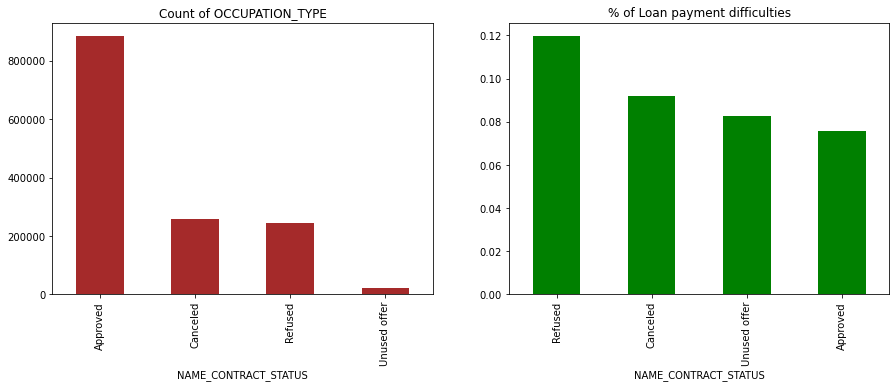

In [100]:
# Distribution of Contract Status and its category with maximum % of Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata_merge.groupby('NAME_CONTRACT_STATUS')['TARGET'].count().sort_values(ascending=False).plot.bar(color="brown")
plt.title("Count of OCCUPATION_TYPE")

plt.subplot(1,2,2)
((appdata_merge[appdata_merge["TARGET"]==1]).groupby('NAME_CONTRACT_STATUS')['TARGET'].count()/appdata_merge.groupby('NAME_CONTRACT_STATUS')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="green")
plt.title("% of Loan payment difficulties")
plt.show()

From the first graph it can be seen that most of the contracts from previous application have been Approved

It can be clearly seen from the second graph that the 
- 'Refused' contracts from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
- 'Approved' contracts from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application. 

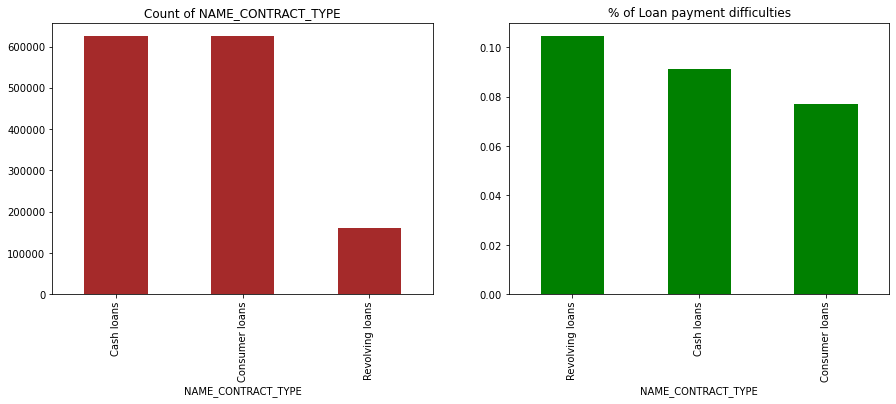

In [101]:
# Distribution of Contract Status and its category with maximum % of Loan-Payment Difficulties 

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata_merge.groupby('NAME_CONTRACT_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="brown")
plt.title("Count of NAME_CONTRACT_TYPE")

plt.subplot(1,2,2)
((appdata_merge[appdata_merge["TARGET"]==1]).groupby('NAME_CONTRACT_TYPE')['TARGET'].count()/appdata_merge.groupby('NAME_CONTRACT_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="green")
plt.title("% of Loan payment difficulties")
plt.show()

From the first graph it can be seen that most of the contract type from previous application was 'Cash loans'

It can be clearly seen from the second graph that the 
- 'Revolving Loans' contracts from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
- 'Consumer loans' contracts from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application. 

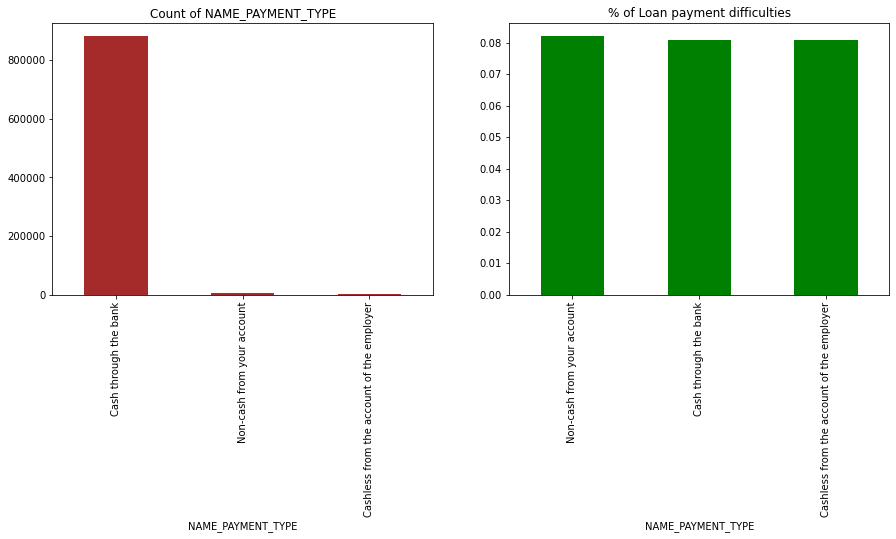

In [102]:
# Distribution of Payment Type and its category with maximum % of Loan-Payment Difficulties
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata_merge.groupby('NAME_PAYMENT_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="brown")
plt.title("Count of NAME_PAYMENT_TYPE")

plt.subplot(1,2,2)
((appdata_merge[appdata_merge["TARGET"]==1]).groupby('NAME_PAYMENT_TYPE')['TARGET'].count()/appdata_merge.groupby('NAME_PAYMENT_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="green")
plt.title("% of Loan payment difficulties")
plt.show()

From the first graph it can be seen that most of the payment type from previous application was 'Cash through bank'

It can be clearly seen from the second graph that all three types of payments from the previous application have almost same % of Loan-Payment Difficulties from current application 

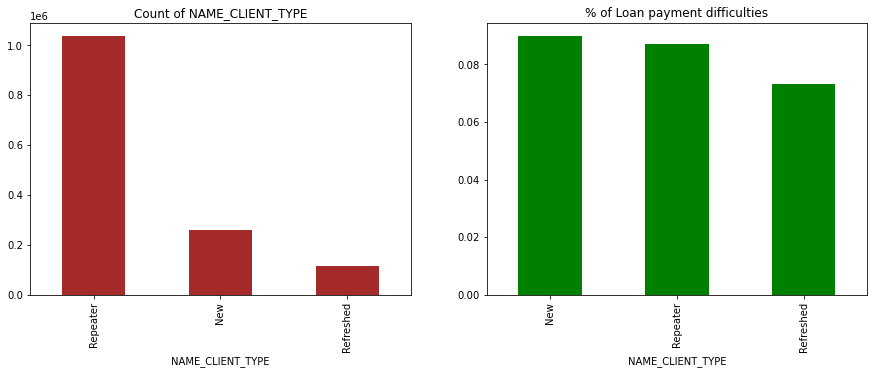

In [103]:
# Distribution of Client Type and its category with maximum % of Loan-Payment Difficulties 
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata_merge.groupby('NAME_CLIENT_TYPE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="brown")
plt.title("Count of NAME_CLIENT_TYPE")

plt.subplot(1,2,2)
((appdata_merge[appdata_merge["TARGET"]==1]).groupby('NAME_CLIENT_TYPE')['TARGET'].count()/appdata_merge.groupby('NAME_CLIENT_TYPE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="green")
plt.title("% of Loan payment difficulties")
plt.show()

From the first graph it can be seen that most of the clients from previous application are 'Repeater'

It can be clearly seen from the second graph that the 
- 'New' clients from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
- 'Refreshed' clients from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application. 

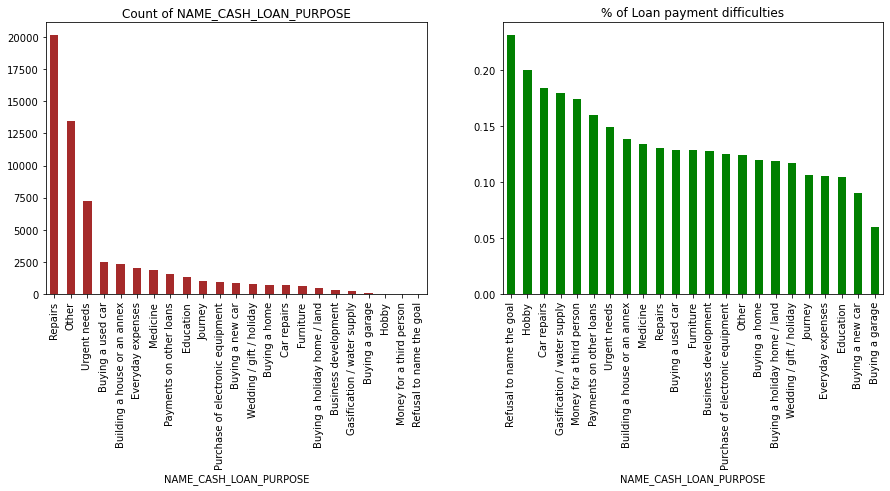

In [104]:
# Distribution of Cash Loan Purpose and its category with maximum % of Loan-Payment Difficulties 
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
appdata_merge.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].count().sort_values(ascending=False).plot.bar(color="brown")
plt.title("Count of NAME_CASH_LOAN_PURPOSE")

plt.subplot(1,2,2)
((appdata_merge[appdata_merge["TARGET"]==1]).groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].count()/appdata_merge.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].count()).sort_values(ascending=False).plot.bar(color="green")
plt.title("% of Loan payment difficulties")
plt.show()

From the first graph it can be seen that purpose of cash loan from previous data was maximum for 'Repairs' 

It can be clearly seen from the second graph that the 
- 'Refusal to name the goal' for cash loan from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.

In [105]:
table = pd.pivot_table(appdata_merge, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [106]:
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338


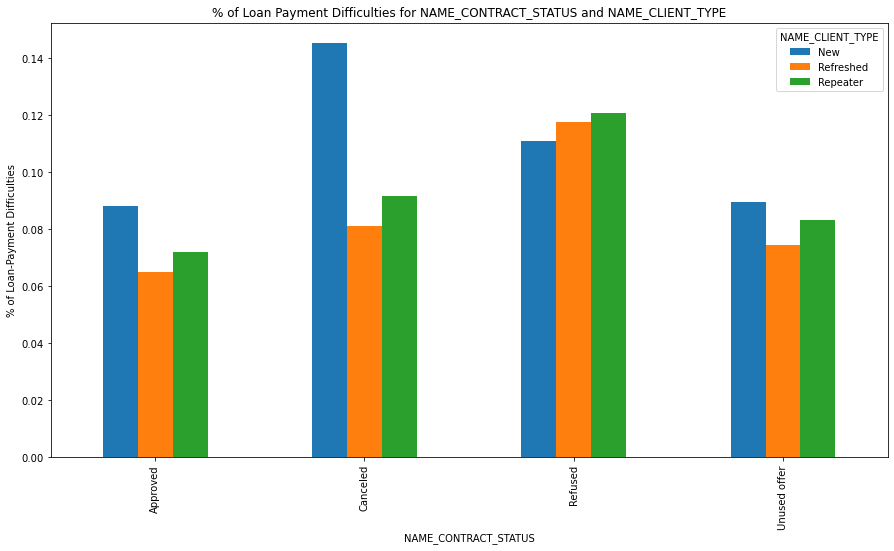

In [107]:
ax = table.T.plot.bar(figsize=[15,8])
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE')
plt.show()

It can be observed from the above graph that Client who where 'New' and had 'Cancelled' previous application tend to have more % of Loan-Payment Difficulties in current application 

In [108]:
table = pd.pivot_table(appdata_merge, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [109]:
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075516,0.088401,0.12581,0.092593
Consumer loans,0.073853,0.128668,0.10135,0.082337
Revolving loans,0.090343,0.109254,0.12905,0.000000


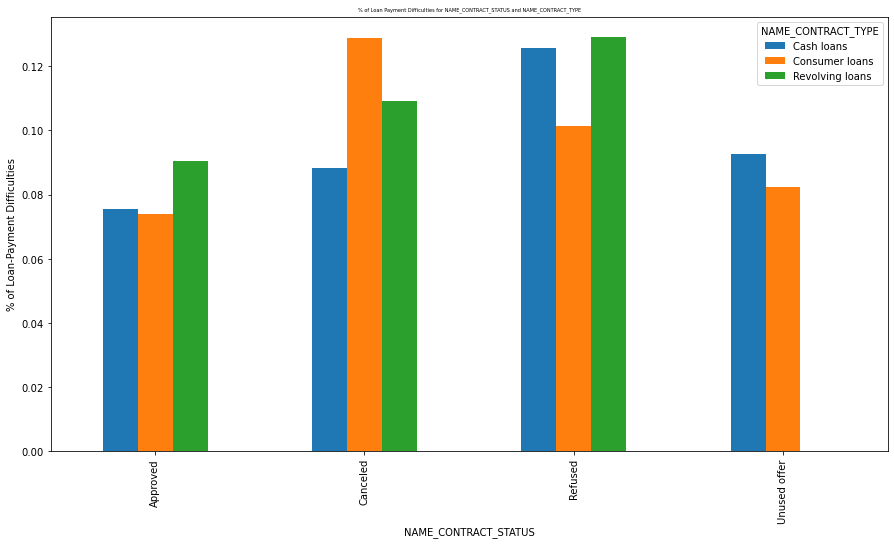

In [110]:
ax = table.T.plot.bar(figsize=[15,8])
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE', fontdict={'fontsize':5})
plt.show()

It can be observed from the above graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of Loan-Payment Difficulties in current application 

## 5. Insights

### 5.1 Application Data

- The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties- around 40%. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.

- The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.

- The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.


### 5.2 Previous Application Data

- The count of ‘Refusal to name the goal’ in ‘NAME_CASH_LOAN_PURPOSE’ is comparatively very less and it also has maximum % of payment difficulties- around 23%. Hence, clients who have ‘Refused to name the goal’ for cash loan in previous application are the driving factors for Loan Defaulters.

- The count of ‘Refused’ in ‘NAME_CONTRACT_STATUS’ is comparatively less and it also has maximum % of payment difficulties- around 12%. Hence, client with contract status as ‘Refused’ in previous application are the driving factors for Loan Defaulters.

- The count of ‘Revolving Loans’ in ‘NAME_CONTRACT_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 10%. Hence, client with contract type as ‘Revolving loans’ in previous application are the driving factors for Loan Defaulters.

- It can be observed from the graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of payment difficulties in current application. Since the count of both 'Revolving loans' and ‘Refused’ is comparatively less(from the graphs in previous slide), clients with ‘Revolving Loans’ and ‘Refused’ previous application are driving factors for Loan Defaulters